In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
def data_reading(path):
    df = pd.read_csv(path)
    return df
df=data_reading('Countries_data.csv')
df

,Country Name,Development_Level,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,Emerging,25.359596,41.010524,11.683578,44.018003,1.887654e+10,13.802552,49.445204,12.399148,...,11.034200,3.674163e+07,6.528600e+05,9.505712e+10,9.248778e+10,2.199404e+09,2.612871e+09,2.569338e+09,513.969739,56.277958
1,Afghanistan,Least Developed,28.095996,40.636703,14.221913,44.018003,1.283959e+10,10.097032,49.445204,22.743731,...,8.184683,2.795250e+07,6.528600e+05,9.505712e+10,9.248778e+10,1.834209e+09,1.289678e+09,2.569338e+09,455.802141,42.815454
2,Albania,Least Developed,19.360804,64.763660,11.672968,26.864451,1.126265e+10,6.093392,46.962738,22.723143,...,15.022826,2.930193e+06,2.875000e+04,3.178484e+09,5.287413e+09,1.341022e+09,6.907093e+08,-2.108930e+09,3885.436636,101.919757
3,Algeria,Least Developed,9.910880,46.736176,15.468675,34.258635,1.443766e+11,5.035450,28.120085,45.919470,...,14.186087,3.708318e+07,2.381740e+06,4.780218e+10,4.190405e+10,2.239170e+10,7.739661e+09,5.898133e+09,3824.243132,15.569782
4,American Samoa,Emerging,10.893914,61.738665,14.458547,76.969167,6.011000e+08,6.167133,106.041715,26.315490,...,8.115195,5.315704e+04,2.000000e+02,4.535211e+08,6.318804e+08,4.304518e+10,3.214250e+10,-1.783594e+08,11469.232094,265.785217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,West Bank and Gaza,Least Developed,9.681009,57.715810,16.889268,20.516506,4.313600e+09,6.167133,67.122589,21.492489,...,10.630000,2.922153e+06,6.020000e+03,8.850000e+08,2.895400e+09,7.285355e+08,3.214250e+10,-2.010400e+09,1476.171850,485.407475
267,"Yemen, Rep.",Least Developed,12.946455,32.668556,19.971232,18.678628,2.474992e+10,5.199995,38.334982,38.529367,...,12.833609,2.573682e+07,5.279700e+05,4.739103e+09,9.342073e+09,4.751987e+09,1.275336e+09,-4.602970e+09,946.405314,48.746743
268,Zambia,Least Developed,9.379791,63.517218,13.343983,34.982245,1.754562e+10,5.200252,34.772747,31.597187,...,10.028348,1.449788e+07,7.526100e+05,6.540822e+09,6.102449e+09,2.488362e+09,8.331463e+08,4.383727e+08,1148.890720,19.263469
269,Zimbabwe,Emerging,9.609863,49.833418,8.536720,29.640895,1.204166e+10,10.475839,53.483295,20.693719,...,5.189000,1.283977e+07,3.907600e+05,3.569254e+09,6.440274e+09,1.027962e+09,1.261464e+09,-2.871020e+09,937.840340,32.858458


In [3]:
def Data_Exploration(dataframe):
   info = dataframe.info()
   desc = dataframe.describe()
   nulls = dataframe.isnull().sum()
   return info, desc, nulls

data_exploring=Data_Exploration(df)
data_exploring

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   271 non-null    object 
 1   Development_Level              271 non-null    object 
 2   Agriculture (% GDP)            271 non-null    float64
 3   Ease of Doing Business         271 non-null    float64
 4   Education Expenditure (% GDP)  271 non-null    float64
 5   Export (% GDP)                 271 non-null    float64
 6   GDP                            271 non-null    float64
 7   Health Expenditure (% GDP)     271 non-null    float64
 8   Import (% GDP)                 271 non-null    float64
 9   Industry (% GDP)               271 non-null    float64
 10  Inflation Rate                 271 non-null    float64
 11  R&D                            271 non-null    float64
 12  Service (% GDP)                271 non-null    flo

(None,
        Agriculture (% GDP)  Ease of Doing Business  \
 count           271.000000              271.000000   
 mean             10.571315               62.040105   
 std               9.854902               12.772564   
 min               0.016652               20.116916   
 25%               2.595095               54.716778   
 50%               8.450963               61.738665   
 75%              14.845753               71.921700   
 max              53.508628               87.018468   
 
        Education Expenditure (% GDP)  Export (% GDP)           GDP  \
 count                     271.000000      271.000000  2.710000e+02   
 mean                       14.529307       43.383674  3.521067e+11   
 std                         4.242290       28.620506  1.494126e+12   
 min                         2.925256        6.830969  3.520511e+07   
 25%                        11.526445       25.916448  4.606676e+09   
 50%                        14.458547       39.245283  2.168026e+10   

In [4]:
def Data_Cleaning(data):
    data.drop(['Country Name'],axis=1,inplace=True)
    label_encoder=LabelEncoder()
    data['Development_Level']=label_encoder.fit_transform(data['Development_Level'])
    return data,label_encoder

data_cleaning=Data_Cleaning(df)
data_cleaning[0].head()

,Development_Level,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,1,25.359596,41.010524,11.683578,44.018003,1.887654e+10,13.802552,49.445204,12.399148,3.682597,...,11.034200,3.674163e+07,6.528600e+05,9.505712e+10,9.248778e+10,2.199404e+09,2.612871e+09,2.569338e+09,513.969739,56.277958
1,3,28.095996,40.636703,14.221913,44.018003,1.283959e+10,10.097032,49.445204,22.743731,6.802960,...,8.184683,2.795250e+07,6.528600e+05,9.505712e+10,9.248778e+10,1.834209e+09,1.289678e+09,2.569338e+09,455.802141,42.815454
2,3,19.360804,64.763660,11.672968,26.864451,1.126265e+10,6.093392,46.962738,22.723143,2.547181,...,15.022826,2.930193e+06,2.875000e+04,3.178484e+09,5.287413e+09,1.341022e+09,6.907093e+08,-2.108930e+09,3885.436636,101.919757
3,3,9.910880,46.736176,15.468675,34.258635,1.443766e+11,5.035450,28.120085,45.919470,4.242714,...,14.186087,3.708318e+07,2.381740e+06,4.780218e+10,4.190405e+10,2.239170e+10,7.739661e+09,5.898133e+09,3824.243132,15.569782
4,1,10.893914,61.738665,14.458547,76.969167,6.011000e+08,6.167133,106.041715,26.315490,6.991400,...,8.115195,5.315704e+04,2.000000e+02,4.535211e+08,6.318804e+08,4.304518e+10,3.214250e+10,-1.783594e+08,11469.232094,265.785217


In [7]:
df.columns

Index(['Development_Level', 'Agriculture (% GDP)', 'Ease of Doing Business',
       'Education Expenditure (% GDP)', 'Export (% GDP)', 'GDP',
       'Health Expenditure (% GDP)', 'Import (% GDP)', 'Industry (% GDP)',
       'Inflation Rate', 'R&D', 'Service (% GDP)', 'Unemployment',
       'Population', 'Land', 'Export', 'Import', 'Education Expenditure',
       'Health Expenditure', 'Net Trade', 'GDP Per Capita',
       'Population Density'],
      dtype='object')

In [5]:
# Emerging 1 , Least Developed 3,Developing 0 , High Developed 2

def Data_Spliting(df):
    X = df.drop("Development_Level", axis=1)
    y = df["Development_Level"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test
data_spliting=Data_Spliting(data_cleaning[0])
data_spliting


(     Agriculture (% GDP)  Ease of Doing Business  \
 33              2.175798               65.840802   
 184            10.893914               61.738665   
 142            51.819275               42.058992   
 197             0.683295               69.573292   
 37              0.955063               65.537696   
 ..                   ...                     ...   
 20             16.290716               42.200396   
 188            22.927240               54.454442   
 71              6.047365               58.806852   
 106            26.836707               54.985055   
 102            11.604911               62.058124   
 
      Education Expenditure (% GDP)  Export (% GDP)           GDP  \
 33                       21.822577       52.334752  8.336655e+09   
 184                      14.458547       62.173529  1.029897e+09   
 142                       8.938359       44.018003  2.268958e+09   
 197                      17.260414       63.980182  9.364320e+10   
 37              

In [6]:
def KNN(X_train, X_test, y_train, y_test, param_grid):
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    return y_pred,best_knn

param_grid={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan'],
    }
knn=KNN(data_spliting[0],data_spliting[1],data_spliting[2],data_spliting[3],param_grid)
knn[0]

array([3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1])

In [7]:
def Model_Evaluation(y_pred,y_test):
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    cr_dict=classification_report(y_test,y_pred,output_dict=True)
    return cr,cm,cr_dict

model_evaluation=Model_Evaluation(knn[0],data_spliting[3])
print(model_evaluation[0])

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.61      0.83      0.70        24
           3       0.81      0.61      0.69        28

    accuracy                           0.69        55
   macro avg       0.81      0.59      0.63        55
weighted avg       0.73      0.69      0.69        55



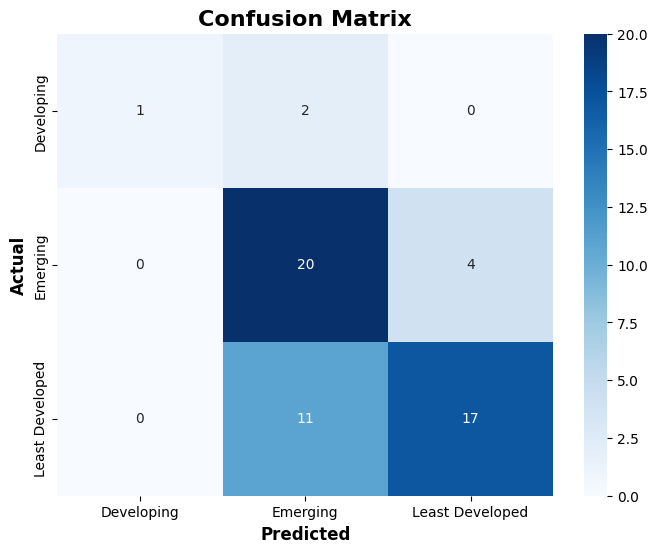

In [8]:
def Confusion_Matrix(cm):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Developing','Emerging','Least Developed'], yticklabels=['Developing','Emerging','Least Developed'])
    plt.xlabel('Predicted', fontsize=12, weight='bold')
    plt.ylabel('Actual',fontweight='bold', fontsize=12)
    plt.title('Confusion Matrix', fontsize=16, weight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

Confusion_Matrix(model_evaluation[1])

In [18]:
import mlflow

mlflow.set_experiment("Countries_Classification_Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
with mlflow.start_run():
    mlflow.log_params(param_grid)
    mlflow.log_metrics({
        'Accuracy':model_evaluation[2]['accuracy'],
        'Precision_Developing':model_evaluation[2]['0']['precision'],
        'Precision_Emerging': model_evaluation[2]['1']['precision'],
        "Precision_Least_Developed": model_evaluation[2]['3']['precision'],
        "Macro_Average":model_evaluation[2]['macro avg']['f1-score'],

    })
    mlflow.sklearn.log_model(knn[1],"KNN_Model")


2025/10/03 20:01:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 20:02:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run thundering-cow-111 at: http://127.0.0.1:5000/#/experiments/486398639578841270/runs/e1d65d8bc09a4f1281eabdeb18c54729
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486398639578841270


In [9]:
def Random_Forest_Classifier(X_train, X_test, y_train, y_test,param_grid):
    rfc=RandomForestClassifier()
    grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    best_model=grid_search.best_estimator_
    y_pred=best_model.predict(X_test)
    return y_pred,best_model

param_grid1={
    'n_estimators':[10,40,70,100],
    'criterion':['gini','entropy'],
    'max_depth':[None,5,9,12],
    'max_features':['sqrt',5,10,15,20],
    'max_samples':[0.5,0.7,0.9]
}

random_forest_classifier=Random_Forest_Classifier(data_spliting[0],data_spliting[1],data_spliting[2],data_spliting[3],param_grid1)
random_forest_classifier[0]


array([3, 3, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3])

In [10]:
rfc_evalaution=Model_Evaluation(random_forest_classifier[0],data_spliting[3])
print(rfc_evalaution[0])

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.73      0.92      0.81        24
           3       0.87      0.71      0.78        28

    accuracy                           0.80        55
   macro avg       0.87      0.77      0.80        55
weighted avg       0.82      0.80      0.80        55



In [11]:
def Logistic_Regression(X_train, X_test, y_train, y_test,param_grid):
    log_reg=LogisticRegression()
    grid_search=GridSearchCV(estimator=log_reg,param_grid=param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    best_model=grid_search.best_estimator_
    y_pred=best_model.predict(X_test)
    return y_pred,best_model

param_grid2={
    'C':[0.01,0.1,1,10,100],
    'solver':['liblinear','saga','lbfgs'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300]
}
logistic_regression=Logistic_Regression(data_spliting[0],data_spliting[1],data_spliting[2],data_spliting[3],param_grid2)
logistic_regression[0]

array([3, 3, 1, 1, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3])

In [12]:
lr=Model_Evaluation(logistic_regression[0],data_spliting[3])
print(lr[0])

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.80      1.00      0.89        24
           3       1.00      0.86      0.92        28

    accuracy                           0.89        55
   macro avg       0.93      0.73      0.77        55
weighted avg       0.91      0.89      0.89        55



In [15]:
models=[
    ('KNN',knn[1]),
    ('Random_Forest',random_forest_classifier[1]),
    ('Logistic_Regression',logistic_regression[1])
]
reports=[model_evaluation[2],rfc_evalaution[2],lr[2]]
param_grid_list=[param_grid,param_grid1,param_grid2]



In [19]:
import mlflow
mlflow.set_experiment("Countries_Classification_Experiment_2")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")


for i, element in enumerate(models):
    model_name=element[0]
    model=element[1]
    report=reports[i]
    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(param_grid_list[i])
        if model_name=='KNN':
            mlflow.log_params(param_grid)
        elif model_name=='Random_Forest':
            mlflow.log_params(param_grid1)
        else:
            mlflow.log_params(param_grid2)
        mlflow.log_metrics({
            'Accuracy':report['accuracy'],
            'Precision_Developing':report['0']['precision'],
            'Precision_Emerging': report['1']['precision'],
            "Precision_Least_Developed": report['3']['precision'],
            "Macro_Average":report['macro avg']['f1-score'],

        })
        mlflow.sklearn.log_model(model, "Model")


2025/10/04 17:36:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 17:37:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/900810910158501749/runs/97d46f810db342d5a3e8afb4acb8f956
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/900810910158501749


2025/10/04 17:37:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 17:37:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random_Forest at: http://127.0.0.1:5000/#/experiments/900810910158501749/runs/6a5e3007e5fd4e8f9c42a2e25311cf1f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/900810910158501749


2025/10/04 17:37:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 17:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic_Regression at: http://127.0.0.1:5000/#/experiments/900810910158501749/runs/a7136975520d4323b0a6989a2879d8a7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/900810910158501749


In [43]:
import mlflow 
mlflow.set_experiment("Classification_Countries")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name='Countries_Regression'):
    mlflow.log_params(param_grid2)
    mlflow.log_metrics({
        'Accuracy':lr[2]['accuracy'],
        'Precision_Developing':lr[2]['0']['precision'],
        'Precision_Emerging': lr[2]['1']['precision'],
        "Precision_Least_Developed": lr[2]['3']['precision'],
        "F1-Score Developing":lr[2]['0']['f1-score'],
        "F1-Score Emerging":lr[2]['1']['f1-score'],
        "F1-Score Least Developed":lr[2]['3']['f1-score'],
    })
    mlflow.sklearn.log_model(logistic_regression[1],artifact_path='model')

2025/10/05 15:34:25 INFO mlflow.tracking.fluent: Experiment with name 'Classification_Countries' does not exist. Creating a new experiment.
2025/10/05 15:34:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 15:34:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Countries_Regression at: http://127.0.0.1:5000/#/experiments/265276487410155560/runs/eecd51066ffc485bb29515caddf5b75c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/265276487410155560


In [68]:
model_name1='Countries_Classification'
run_id = "eecd51066ffc485bb29515caddf5b75c"
model_uri = f"runs:/{run_id}/model"
result=mlflow.register_model(model_uri,model_name1)


Registered model 'Countries_Classification' already exists. Creating a new version of this model...
2025/10/05 19:53:59 WARNING mlflow.tracking._model_registry.fluent: Run with id eecd51066ffc485bb29515caddf5b75c has no artifacts at artifact path 'model', registering model based on models:/m-ab70396aafb4491f8cc6cf76ea60d367 instead
2025/10/05 19:54:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Countries_Classification, version 3
Created version '3' of model 'Countries_Classification'.


In [ ]:
from mlflow.tracking import MlflowClient
import mlflow.sklearn

client = MlflowClient()
latest_version = client.get_registered_model("Countries_Classification").latest_versions[0].version

model_uri = f"models:/Countries_Classification/{latest_version}"
loaded_model = mlflow.sklearn.load_model(model_uri)


In [70]:
y_pred=loaded_model.predict(data_spliting[1])
y_pred[:5]

array([3, 3, 1, 1, 1])

In [71]:
devl_model_uri=f"models:/Countries_Classification/{latest_version}"
prod_model='Countries_Development_Detection'
client=mlflow.MlflowClient()
client.copy_model_version(src_model_uri=devl_model_uri,dst_name=prod_model)


Successfully registered model 'Countries_Development_Detection'.
Copied version '3' of model 'Countries_Classification' to version '1' of model 'Countries_Development_Detection'.


<ModelVersion: aliases=[], creation_timestamp=1759676391430, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759676391430, metrics=None, model_id=None, name='Countries_Development_Detection', params=None, run_id='eecd51066ffc485bb29515caddf5b75c', run_link='', source='models:/Countries_Classification/3', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [ ]:
@step
def read_data_step() -> pd.DataFrame:
    return data_reading("Countries_data.csv")

@step
def explore_data_step(df: pd.DataFrame):
    return Data_Exploration(df)

@step
def clean_data_step(df: pd.DataFrame) -> pd.DataFrame:
    return Data_Cleaning(df)

@step
def split_data_step(df: pd.DataFrame):
    return Data_Spliting(df)

@step
def knn_step(splits, param_grid: dict):
    X_train, X_test, y_train, y_test = splits
    return KNN(X_train, X_test, y_train, y_test, param_grid)

@step
def evaluate_step(knn_result, splits):
    y_pred, _ = knn_result
    _, X_test, _, y_test = splits
    return Model_Evaluation(y_pred, y_test)

# ---------------- ZenML Pipeline ---------------- #
#from zenml.integrations.mlflow.steps import mlflow_deployer_step
@pipeline
def knn_pipeline():
    df = read_data_step()
    _ = explore_data_step(df)
    cleaned_df = clean_data_step(df)
    splits = split_data_step(cleaned_df)
    knn_result = knn_step(splits, param_grid)
    evaluation = evaluate_step(knn_result, splits)
    return evaluation

# ---------------- Run Pipeline ---------------- #

if __name__ == "__main__":
    pipe = knn_pipeline()
    

Initiating a new run for the pipeline: knn_pipeline.


Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Using cached version of step read_data_step.
Using cached version of step clean_data_step.
Using cached version of step explore_data_step.
Using cached version of step split_data_step.
Using cached version of step knn_step.
Using cached version of step evaluate_step.
All steps of the pipeline run were cached.
